# LIBRARYS

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import ipywidgets as widgets
from IPython.display import display
import ipywidgets as widgets
from IPython.display import display, clear_output


# CSV IMPORT

In [6]:
sns.set(style="whitegrid")

uploaded = files.upload()

df = pd.read_csv('covid_19_data.csv')
df.head()


Saving covid_19_data.csv to covid_19_data (1).csv


,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


# ML TRAINING

In [7]:
df['ObservationDate'] = pd.to_datetime(df['ObservationDate'])

df_model = df[['Confirmed', 'Recovered', 'Deaths']].dropna()

X = df_model[['Confirmed', 'Recovered']]
y = df_model['Deaths']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² (coeficiente de determinação): {r2:.2f}")



MAE: 1048.48
RMSE: 2909.79
R² (coeficiente de determinação): 0.79


# Code for the chart of COVID-19 causes

In [8]:
df['Country/Region'].unique()


array(['Mainland China', 'Hong Kong', 'Macau', 'Taiwan', 'US', 'Japan',
       'Thailand', 'South Korea', 'China', 'Kiribati', 'Singapore',
       'Philippines', 'Malaysia', 'Vietnam', 'Australia', 'Mexico',
       'Brazil', 'Colombia', 'France', 'Nepal', 'Canada', 'Cambodia',
       'Sri Lanka', 'Ivory Coast', 'Germany', 'Finland',
       'United Arab Emirates', 'India', 'Italy', 'UK', 'Russia', 'Sweden',
       'Spain', 'Belgium', 'Others', 'Egypt', 'Iran', 'Israel', 'Lebanon',
       'Iraq', 'Oman', 'Afghanistan', 'Bahrain', 'Kuwait', 'Austria',
       'Algeria', 'Croatia', 'Switzerland', 'Pakistan', 'Georgia',
       'Greece', 'North Macedonia', 'Norway', 'Romania', 'Denmark',
       'Estonia', 'Netherlands', 'San Marino', ' Azerbaijan', 'Belarus',
       'Iceland', 'Lithuania', 'New Zealand', 'Nigeria', 'North Ireland',
       'Ireland', 'Luxembourg', 'Monaco', 'Qatar', 'Ecuador',
       'Azerbaijan', 'Czech Republic', 'Armenia', 'Dominican Republic',
       'Indonesia', 'Portugal

In [9]:
df_grouped = df.groupby(['Country/Region', 'ObservationDate'])[['Confirmed', 'Deaths', 'Recovered']].sum().reset_index()
df_grouped.head()


,Country/Region,ObservationDate,Confirmed,Deaths,Recovered
0,Azerbaijan,2020-02-28,1.0,0.0,0.0
1,"('St. Martin',)",2020-03-10,2.0,0.0,0.0
2,Afghanistan,2020-02-24,1.0,0.0,0.0
3,Afghanistan,2020-02-25,1.0,0.0,0.0
4,Afghanistan,2020-02-26,1.0,0.0,0.0


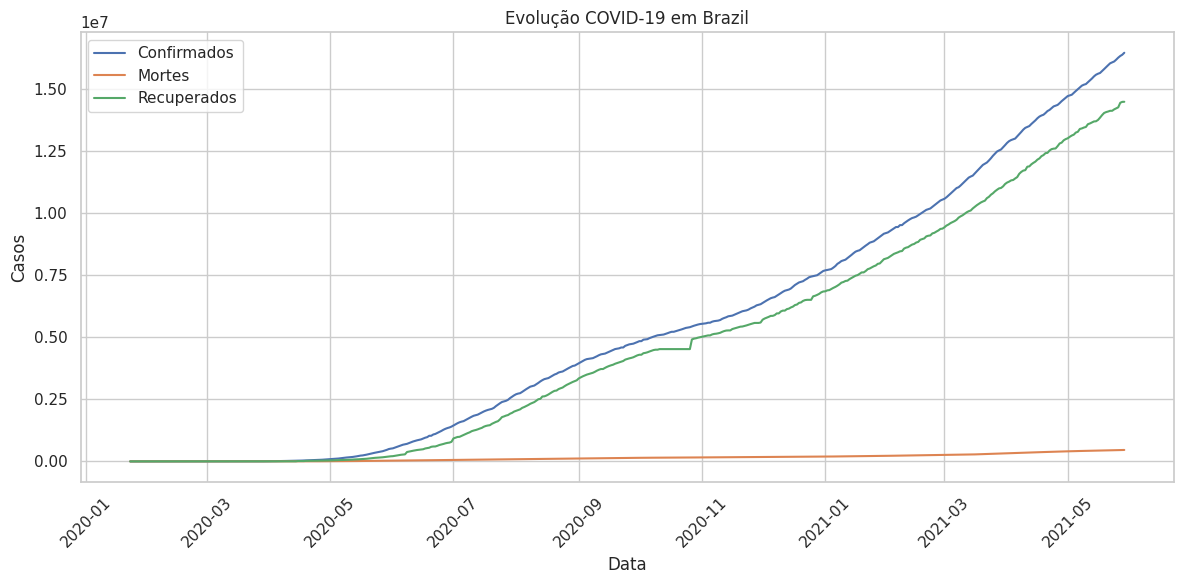

In [10]:
def grafico_pais(pais):
    dados_pais = df_grouped[df_grouped['Country/Region'] == pais]

    plt.figure(figsize=(12,6))
    plt.plot(dados_pais['ObservationDate'], dados_pais['Confirmed'], label='Confirmados')
    plt.plot(dados_pais['ObservationDate'], dados_pais['Deaths'], label='Mortes')
    plt.plot(dados_pais['ObservationDate'], dados_pais['Recovered'], label='Recuperados')

    plt.title(f"Evolução COVID-19 em {pais}")
    plt.xlabel("Data")
    plt.ylabel("Casos")
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

grafico_pais('Brazil')


<ipython-input-11-02d39acbd249>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Confirmed', y=df_top_paises.index, data=df_top_paises, palette='Reds_r')


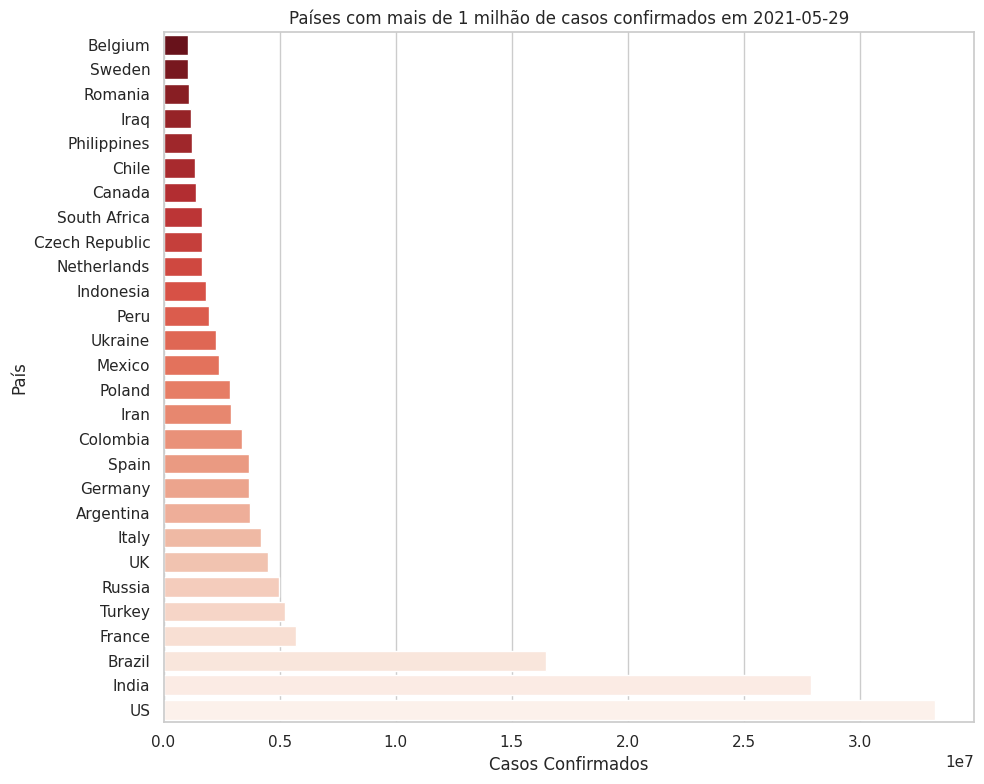

In [11]:
data_mais_recente = df_grouped['ObservationDate'].max()
df_ultimo_dia = df_grouped[df_grouped['ObservationDate'] == data_mais_recente]

df_top_paises = df_ultimo_dia.groupby('Country/Region')[['Confirmed']].sum()

df_top_paises = df_top_paises[df_top_paises['Confirmed'] > 1_000_000]

df_top_paises = df_top_paises.sort_values(by='Confirmed', ascending=True)

plt.figure(figsize=(10, 8))
sns.barplot(x='Confirmed', y=df_top_paises.index, data=df_top_paises, palette='Reds_r')
plt.title(f'Países com mais de 1 milhão de casos confirmados em {data_mais_recente.date()}')
plt.xlabel('Casos Confirmados')
plt.ylabel('País')
plt.tight_layout()
plt.show()


# Chart of COVID causes working.








In [12]:
paises = sorted(df_grouped['Country/Region'].unique())

dropdown_paises = widgets.Dropdown(
    options=paises,
    description='País:',
    value='Brazil'
)

def mostrar_grafico(pais):
    dados_pais = df_grouped[df_grouped['Country/Region'] == pais]

    plt.figure(figsize=(12, 6))
    plt.plot(dados_pais['ObservationDate'], dados_pais['Confirmed'], label='Confirmados')
    plt.plot(dados_pais['ObservationDate'], dados_pais['Deaths'], label='Mortes')
    plt.plot(dados_pais['ObservationDate'], dados_pais['Recovered'], label='Recuperados')

    plt.title(f'Evolução da COVID-19 em {pais}')
    plt.xlabel('Data')
    plt.ylabel('Casos')
    plt.legend()
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

widgets.interact(mostrar_grafico, pais=dropdown_paises);

interactive(children=(Dropdown(description='País:', index=27, options=(' Azerbaijan', "('St. Martin',)", 'Afgh…

# COVID Death Estimator

In [13]:
input_confirmed = widgets.IntText(
    value=100000,
    description='Confirmados:',
    step=1000
)

input_recovered = widgets.IntText(
    value=80000,
    description='Recuperados:',
    step=1000
)

botao_prever = widgets.Button(description="Prever Mortes", button_style='success')

saida = widgets.Output()

def ao_clicar_botao(b):
    with saida:
        clear_output()
        x_novo = [[input_confirmed.value, input_recovered.value]]
        predicao = model.predict(x_novo)
        print(f"Previsão de mortes: {int(predicao[0]):,} mortes esperadas")

botao_prever.on_click(ao_clicar_botao)
display(input_confirmed, input_recovered, botao_prever, saida)


IntText(value=100000, description='Confirmados:', step=1000)

IntText(value=80000, description='Recuperados:', step=1000)

Button(button_style='success', description='Prever Mortes', style=ButtonStyle())

Output()